In [1]:
import torch

In [2]:

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\prash\AppData\Local\Temp\ipykernel_20200\276732840.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
np.random.seed(1)
# Generating training data
x1 = np.random.uniform(7, size=100).round(2)
x2 = np.random.uniform(7, size=100).round(2)
x3 = np.random.uniform(-7, 0, size=100).round(2)
x4 = np.random.uniform(-7, 0, size=100).round(2)

dataset_0_0 = pd.DataFrame({'x1': x1[ : 50], 'x2': x2[ : 50], 'y': [0]*50})
dataset_0_1 = pd.DataFrame({'x1': x1[50 : ], 'x2': x4[ : 50], 'y': [1]*50})
dataset_1_0 = pd.DataFrame({'x1': x3[ : 50], 'x2': x2[50 : ], 'y': [1]*50})
dataset_1_1 = pd.DataFrame({'x1': x3[50 : ], 'x2': x4[50 : ], 'y': [0]*50})

train_data = pd.concat([dataset_0_0, dataset_0_1, dataset_1_0, dataset_1_1])
train_data

,x1,x2,y
0,4.50,5.04,0
1,2.68,3.84,0
2,7.00,1.68,0
3,5.19,4.86,0
4,6.12,1.55,0
...,...,...,...
45,-6.52,-1.09,0
46,-4.35,-4.33,0
47,-6.44,-1.75,0
48,-0.12,-3.42,0


<function matplotlib.pyplot.show(close=None, block=None)>

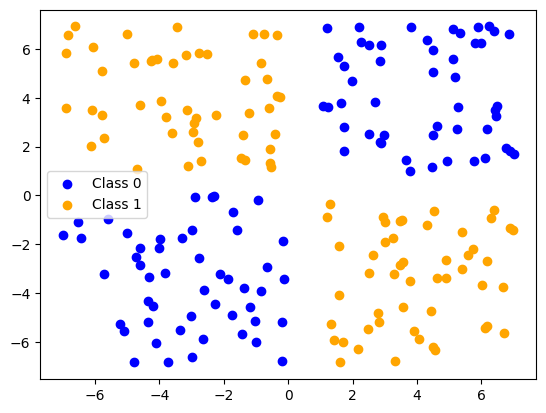

In [4]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(train_data['x1'][train_data['y'] == 0], train_data['x2'][train_data['y'] == 0], color = 'blue', label='Class 0')
ax.scatter(train_data['x1'][train_data['y'] == 1], train_data['x2'][train_data['y'] == 1], color = 'orange', label='Class 1')
ax.legend()
plt.show

In [5]:
np.random.seed(1)
# Generating test data
x1 = np.random.uniform(7, size=100).round(2)
x2 = np.random.uniform(7, size=100).round(2)
x3 = np.random.uniform(-7, 0, size=100).round(2)
x4 = np.random.uniform(-7, 0, size=100).round(2)

dataset_0_0 = pd.DataFrame({'x1': x1[ : 50], 'x2': x2[ : 50], 'y1': [0]*50})
dataset_0_1 = pd.DataFrame({'x1': x1[50 : ], 'x2': x4[ : 50], 'y1': [1]*50})
dataset_1_0 = pd.DataFrame({'x1': x3[ : 50], 'x2': x2[50 : ], 'y1': [1]*50})
dataset_1_1 = pd.DataFrame({'x1': x3[50 : ], 'x2': x4[50 : ], 'y1': [0]*50})

test_data = pd.concat([dataset_0_0, dataset_0_1, dataset_1_0, dataset_1_1])

<function matplotlib.pyplot.show(close=None, block=None)>

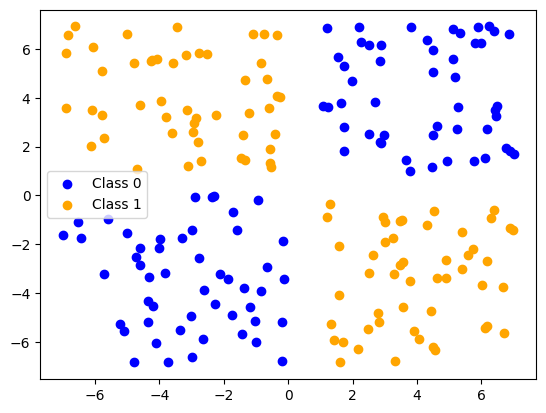

In [6]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(test_data['x1'][test_data['y1'] == 0], test_data['x2'][test_data['y1'] == 0], color = 'blue', label='Class 0')
ax.scatter(test_data['x1'][test_data['y1'] == 1], test_data['x2'][test_data['y1'] == 1], color = 'orange', label='Class 1')
ax.legend()
plt.show

In [7]:
# Define custom dataset
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [8]:
# Shuffle train and test data
train_data = train_data.sample(frac=1).reset_index(drop=True)
test_data = test_data.sample(frac=1).reset_index(drop=True)

In [9]:
# Define features and target variable
X_train = train_data[['x1', 'x2']].values.astype(np.float32)
y_train = train_data['y'].values.reshape(-1, 1).astype(np.float32)
X_test = test_data[['x1', 'x2']].values.astype(np.float32)
y_test = test_data['y1'].values.reshape(-1, 1).astype(np.float32)

In [10]:
# Create DataLoader
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=200, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=200, shuffle=True)

## MLP

In [11]:
# Define the three-layer MLP model with ReLU activation
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2=2):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.sigmoid(out)
        return out



In [12]:
# Initialize the model, loss function, and optimizer
model = MLP(2, 4)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.03)
model

MLP(
  (fc1): Linear(in_features=2, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=2, bias=True)
  (fc3): Linear(in_features=2, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

In [13]:
# baseline accuracy and loss
accuracy, train_loss = 0, 0
for inputs, labels in train_loader:
    outputs = model(inputs)
    predicted_labels = torch.where(outputs >= 0.5 , 1.0, 0.0)
    accuracy += torch.sum(predicted_labels == labels)
    loss = criterion(outputs, labels)
    train_loss += loss.item() 

print(f'Baseline accuracy {accuracy / len(train_loader.dataset)}, Baseline loss {train_loss/len(train_loader)}')

Baseline accuracy 0.38499999046325684, Baseline loss 0.7334625124931335


In [14]:
# Training loop
epochs = 3000
train_losses = []
prev_loss = float('inf')  # Initialize previous loss to infinity
tolerance = 1e-5  # Define a tolerance level for convergence
for epoch in range(epochs):
    train_loss = 0.0
    accuracy = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        predicted_labels = torch.where(outputs >= 0.5 , 1.0, 0.0)
        accuracy += torch.sum(predicted_labels == labels)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() 
    
    if epoch % 100 ==0:
        print(f'Epoch {epoch} Accuracy {accuracy/len(train_loader.dataset):.4f} loss {train_loss/len(train_loader):.4f}')
    
    # Check for convergence
    if prev_loss - train_loss < tolerance:
        print(f'Convergence reached at epoch {epoch}. Stopping training.')
        break

    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    
total_train_loss = np.mean(train_losses)
print(f'Training loss: {total_train_loss:.4f}')

Epoch 0 Accuracy 0.3850 loss 0.7335
Epoch 100 Accuracy 1.0000 loss 0.0279
Epoch 200 Accuracy 1.0000 loss 0.0097
Epoch 300 Accuracy 1.0000 loss 0.0053
Epoch 400 Accuracy 1.0000 loss 0.0034
Epoch 500 Accuracy 1.0000 loss 0.0024
Epoch 600 Accuracy 1.0000 loss 0.0018
Epoch 700 Accuracy 1.0000 loss 0.0014
Epoch 800 Accuracy 1.0000 loss 0.0011
Epoch 900 Accuracy 1.0000 loss 0.0009
Epoch 1000 Accuracy 1.0000 loss 0.0008
Epoch 1100 Accuracy 1.0000 loss 0.0007
Epoch 1200 Accuracy 1.0000 loss 0.0006
Epoch 1300 Accuracy 1.0000 loss 0.0005
Epoch 1400 Accuracy 1.0000 loss 0.0005
Epoch 1500 Accuracy 1.0000 loss 0.0004
Epoch 1600 Accuracy 1.0000 loss 0.0004
Epoch 1700 Accuracy 1.0000 loss 0.0003
Epoch 1800 Accuracy 1.0000 loss 0.0003
Epoch 1900 Accuracy 1.0000 loss 0.0003
Epoch 2000 Accuracy 1.0000 loss 0.0002
Epoch 2100 Accuracy 1.0000 loss 0.0002
Epoch 2200 Accuracy 1.0000 loss 0.0002
Epoch 2300 Accuracy 1.0000 loss 0.0002
Epoch 2400 Accuracy 1.0000 loss 0.0002
Epoch 2500 Accuracy 1.0000 loss 0.000

In [15]:
# MLP on test_data
test_loss = 0.0
accuracy = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted_labels = torch.where(outputs >= 0.5 , 1.0, 0.0)
        accuracy += torch.sum(predicted_labels == labels)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
print(f'Test loss: {test_loss/len(test_loader):.4f}, accuracy: {accuracy/len(test_loader.dataset):.4f}')

Test loss: 0.0001, accuracy: 1.0000


In [16]:
input = torch.tensor([0.48, -0.15])
output = model(input)
print(output)

tensor([0.1191], grad_fn=<SigmoidBackward0>)


In [17]:
# Create meshgrid data for visualization
xx = torch.arange(-7.0, 8.0).clone().detach()
yy = torch.arange(-7.0, 8.0).clone().detach()
xx, yy = torch.meshgrid(xx, yy)

# Flatten meshgrid data
xx1 = xx.reshape(-1, 1)
yy1 = yy.reshape(-1, 1)

# Combine xx1 and yy1 to create input data
data = torch.hstack([xx1, yy1])

# Get predictions from the model
z = model(data)

# Threshold predictions to get binary values
z = torch.where(z > 0.5, 1, 0)

# Reshape z to match the meshgrid dimensions
z = z.reshape(15, 15)


c:\Users\prash\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


#### Decision surface of MLP 

<function matplotlib.pyplot.show(close=None, block=None)>

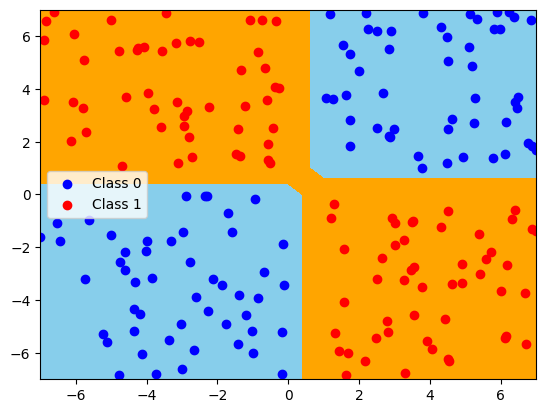

In [18]:
fig = plt.figure()
ax = plt.axes()
ax.contourf(xx, yy, z, colors = ['skyblue', 'orange', 'orange', 'skyblue'], levels = 2)
ax.scatter(test_data['x1'][test_data['y1']==0], test_data['x2'][test_data['y1']==0], color = 'blue', label='Class 0')
ax.scatter(test_data['x1'][test_data['y1']==1], test_data['x2'][test_data['y1']==1], color = 'red', label='Class 1')
ax.legend()
plt.show

## MLP with L1 Regularisation

In [19]:
def create_train_val_loader(train_data, i, block_size, batch_size_train=200, batch_size_val=40):
    start = i * block_size
    end = start + block_size

    val_dataset = train_data[start:end].reset_index(drop=True)
    X_val = val_dataset[['x1', 'x2']].values.astype(np.float32)
    y_val = val_dataset['y'].values.reshape(-1, 1).astype(np.float32)
    val_dataset = CustomDataset(X_val, y_val)
    val_loader = DataLoader(val_dataset, batch_size=batch_size_val, shuffle=True)

    Xy_train = pd.concat([train_data[:start], train_data[end:]], axis=0).reset_index(drop=True)
    X_train = Xy_train[['x1', 'x2']].values.astype(np.float32)
    y_train = Xy_train['y'].values.reshape(-1, 1).astype(np.float32)
    train_dataset = CustomDataset(X_train, y_train)
    train_loader = DataLoader(train_dataset, batch_size=batch_size_train, shuffle=True)

    return train_loader, val_loader

In [20]:
# 5-fold cross validation
K = 5
epochs = 1000
block = len(train_data) // K
valid_loss_acc = {}

for learning_rate in [0.0001, 0.001, 0.01, 0.1, 1]:
    for regularization_coefficient in [0.0001, 0.001, 0.01, 0.1, 1]:
        k_cross_val_loss = []
        k_cross_val_acc = []
        for i in range(K):
            #  Splitting Train into Train and Validation Dataset
            train_loader, val_loader = create_train_val_loader(train_data, i,block)

            # Initialize MLP
            model = MLP(2, 4)
            criterion = nn.BCELoss()
            optimizer = optim.Adam(model.parameters(), lr=learning_rate)

            # Training the model
            train_losses = []
            for epoch in range(epochs):
                train_loss = 0.0
                accuracy = 0
                for inputs, labels in train_loader:
                    optimizer.zero_grad()
                    outputs = model(inputs)
                    predicted_labels = torch.where(outputs >= 0.5, 1.0, 0.0)
                    accuracy += torch.sum(predicted_labels == labels)
                    loss = criterion(outputs, labels)

                    sum = 0
                    for params in model.parameters():
                        params = params.view(-1)
                        sum += torch.sum(torch.abs(params))  # L1 regularization term

                    loss += regularization_coefficient * sum
                    loss.backward()
                    optimizer.step()
                    train_loss += loss.item() 
                
                if epoch % 100 == 0:
                    print(f'Epoch {epoch} Accuracy {accuracy/len(train_loader.dataset):.4f}')

                train_loss /= len(train_loader)
                train_losses.append(train_loss)
                
            total_train_loss = np.mean(train_losses)
            print(f'In {i+1} Cross validation,for {learning_rate}_{regularization_coefficient} Training loss: {total_train_loss:.4f}')

            # Validation
            val_loss = 0.0
            accuracy = 0
            with torch.no_grad():
                for inputs, labels in val_loader:    
                    outputs = model(inputs)
                    predicted_labels = torch.where(outputs >= 0.5, 1.0, 0.0)
                    accuracy += torch.sum(predicted_labels == labels)

                    loss = criterion(outputs, labels)
                    for params in model.parameters():
                        params = params.view(-1)
                        sum += torch.sum(torch.abs(params))  # L1 regularization term
                    loss += regularization_coefficient * sum

                    val_loss += loss.item()

            k_cross_val_loss.append(val_loss/len(val_loader))
            k_cross_val_acc.append(accuracy/len(val_loader.dataset))
            print(f'Validation loss: {val_loss/len(val_loader):.4f}, Validation accuracy: {accuracy/len(val_loader.dataset):.4f}')

        valid_loss_acc[f'{learning_rate}_{regularization_coefficient}_loss'] = np.mean(k_cross_val_loss)
        valid_loss_acc[f'{learning_rate}_{regularization_coefficient}_acc'] = np.mean(k_cross_val_acc)


Epoch 0 Accuracy 0.4812
Epoch 100 Accuracy 0.4812
Epoch 200 Accuracy 0.4812
Epoch 300 Accuracy 0.4812
Epoch 400 Accuracy 0.4812
Epoch 500 Accuracy 0.4812
Epoch 600 Accuracy 0.4812
Epoch 700 Accuracy 0.4812
Epoch 800 Accuracy 0.4812
Epoch 900 Accuracy 0.4812
In 1 Cross validation,for 0.0001_0.0001 Training loss: 0.7875
Validation loss: 0.6580, Validation accuracy: 0.5750
Epoch 0 Accuracy 0.5500
Epoch 100 Accuracy 0.5750
Epoch 200 Accuracy 0.6000
Epoch 300 Accuracy 0.6187
Epoch 400 Accuracy 0.6625
Epoch 500 Accuracy 0.6812
Epoch 600 Accuracy 0.7125
Epoch 700 Accuracy 0.7375
Epoch 800 Accuracy 0.7688
Epoch 900 Accuracy 0.8062
In 2 Cross validation,for 0.0001_0.0001 Training loss: 0.6067
Validation loss: 0.5791, Validation accuracy: 0.8250
Epoch 0 Accuracy 0.4625
Epoch 100 Accuracy 0.4625
Epoch 200 Accuracy 0.4625
Epoch 300 Accuracy 0.4625
Epoch 400 Accuracy 0.4625
Epoch 500 Accuracy 0.4625
Epoch 600 Accuracy 0.4625
Epoch 700 Accuracy 0.4625
Epoch 800 Accuracy 0.4625
Epoch 900 Accuracy 0.4

In [21]:
t = pd.DataFrame(valid_loss_acc, index = ['val']).T
t['val'] = t['val'].apply(lambda x: round(x, 2))
t

,val
0.0001_0.0001_loss,0.60
0.0001_0.0001_acc,0.66
0.0001_0.001_loss,0.66
0.0001_0.001_acc,0.67
0.0001_0.01_loss,0.85
0.0001_0.01_acc,0.50
0.0001_0.1_loss,1.75
0.0001_0.1_acc,0.50
0.0001_1_loss,12.74
0.0001_1_acc,0.44


In [22]:
best_params = t.idxmin()  # Find the hyperparameters that minimize the validation loss
best_loss = t.min()  # Get the minimum validation loss
best_accuracy = t.loc[best_params, 'val']  # Get the accuracy corresponding to the best parameters

# Extract learning rate and regularization coefficient as floats
learning_rate = float(best_params['val'].split('_')[0])
regularization_coefficient = float(best_params['val'].split('_')[1])
validation_loss = best_loss['val']

print("Best Hyperparameters (Minimize Validation Loss):")
print("Learning Rate:", learning_rate)
print("Regularization coefficient:", regularization_coefficient)
print("Validation Loss:", validation_loss)


Best Hyperparameters (Minimize Validation Loss):
Learning Rate: 0.1
Regularization coefficient: 0.001
Validation Loss: 0.05


In [30]:
model = MLP(2,4)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
# regularization_coefficient = 0.001

# training the model
epochs = 3000
train_losses = []
prev_loss = float('inf')  # Initialize previous loss to infinity
tolerance = 1e-5  # Define a tolerance level for convergence
for epoch in range(epochs):
    train_loss = 0.0
    accuracy = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        sum = 0
        for params in model.parameters():
            params = params.view(-1)
            sum += torch.sum(torch.abs(params))

        loss += regularization_coefficient * sum
        loss.backward()
        optimizer.step()

        train_loss += loss.item() 
    
    if epoch % 100 ==0:
        print(f'Epoch {epoch} Accuracy {accuracy/len(train_loader.dataset):.4f} loss {train_loss/len(train_loader):.4f}')

    # Check for convergence
    if prev_loss - train_loss < tolerance:
        print(f'Convergence reached at epoch {epoch}. Stopping training.')
        break

    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    
total_train_loss = np.mean(train_losses)
print(f'Training loss: {total_train_loss:.4f}')

        

Epoch 0 Accuracy 0.0000 loss 0.6694
Epoch 100 Accuracy 0.0000 loss 0.0333
Epoch 200 Accuracy 0.0000 loss 0.0278
Epoch 300 Accuracy 0.0000 loss 0.0244
Epoch 400 Accuracy 0.0000 loss 0.0240
Epoch 500 Accuracy 0.0000 loss 0.0238
Epoch 600 Accuracy 0.0000 loss 0.0238
Epoch 700 Accuracy 0.0000 loss 0.0238
Epoch 800 Accuracy 0.0000 loss 0.0238
Epoch 900 Accuracy 0.0000 loss 0.0238
Epoch 1000 Accuracy 0.0000 loss 0.0238
Epoch 1100 Accuracy 0.0000 loss 0.0238
Epoch 1200 Accuracy 0.0000 loss 0.0238
Epoch 1300 Accuracy 0.0000 loss 0.0439
Epoch 1400 Accuracy 0.0000 loss 0.0354
Epoch 1500 Accuracy 0.0000 loss 0.0305
Epoch 1600 Accuracy 0.0000 loss 0.0281
Epoch 1700 Accuracy 0.0000 loss 0.0263
Epoch 1800 Accuracy 0.0000 loss 0.0247
Epoch 1900 Accuracy 0.0000 loss 0.0235
Epoch 2000 Accuracy 0.0000 loss 0.0226
Epoch 2100 Accuracy 0.0000 loss 0.0217
Epoch 2200 Accuracy 0.0000 loss 0.0209
Epoch 2300 Accuracy 0.0000 loss 0.0201
Epoch 2400 Accuracy 0.0000 loss 0.0200
Epoch 2500 Accuracy 0.0000 loss 0.020

In [31]:
total_params = 0
zero_params = 0

# Iterate over the parameters of the model
for param in model.parameters():
    total_params += param.numel()  # Count total number of parameters
    zero_params += (param == 0).sum().item()  # Count number of zero parameters

# Calculate percentage of zero parameters
percentage_zero_params = (zero_params / total_params) * 100

print("Total Parameters:", total_params)
print("Zero Parameters:", zero_params)
print("Percentage of Parameters that are Zero:", percentage_zero_params)


Total Parameters: 25
Zero Parameters: 0
Percentage of Parameters that are Zero: 0.0


In [32]:
# X_test = test_data[['x1', 'x2']].values.astype(np.float32)
# y_test = test_data['y1'].values.reshape(-1, 1).astype(np.float32)
# test_dataset = CustomDataset(X_test, y_test)
# test_loader = DataLoader(test_dataset, batch_size=200, shuffle=True)

test_loss = 0.0
accuracy = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted_labels = torch.where(outputs >= 0.5 , 1.0, 0.0)
        accuracy += torch.sum(predicted_labels == labels)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
test_loss /= len(test_loader)
print(f'Test loss: {test_loss:.4f}, accuracy: {accuracy/len(test_loader.dataset):.4f}')

Test loss: 0.0017, accuracy: 1.0000


In [33]:
# Generating a grid of points for evaluation
x_values = torch.tensor(torch.arange(-7.0, 8.0), requires_grad=False)
y_values = torch.tensor(torch.arange(-7.0, 8.0), requires_grad=False)
x_values, y_values = torch.meshgrid(x_values, y_values)
x_values = x_values.reshape(-1, 1)
y_values = y_values.reshape(-1, 1)
grid_data = torch.hstack([x_values, y_values])

# Evaluating the model on the grid
model_outputs = model(grid_data)

# Thresholding the model outputs
thresholded_outputs = torch.where(model_outputs > 0.5, 1, 0)

# Reshaping the thresholded outputs into a 2D grid
z = thresholded_outputs.reshape(15, 15)

C:\Users\prash\AppData\Local\Temp\ipykernel_20200\2695446099.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_values = torch.tensor(torch.arange(-7.0, 8.0), requires_grad=False)
C:\Users\prash\AppData\Local\Temp\ipykernel_20200\2695446099.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_values = torch.tensor(torch.arange(-7.0, 8.0), requires_grad=False)


#### Decision surface of MLP with L1 Regularisation

<function matplotlib.pyplot.show(close=None, block=None)>

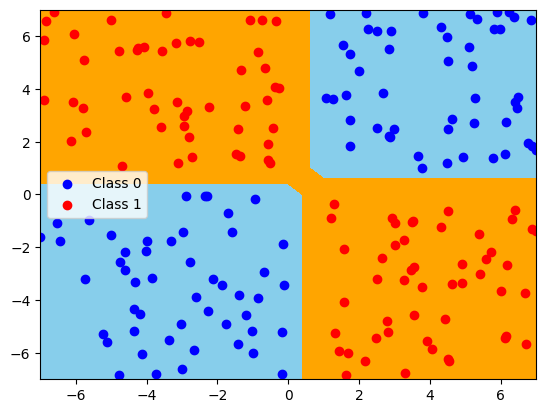

In [34]:
fig = plt.figure()
ax = plt.axes()
ax.contourf(xx, yy, z, colors = ['skyblue', 'orange', 'orange', 'skyblue'], levels = 2)
ax.scatter(test_data['x1'][test_data['y1']==0], test_data['x2'][test_data['y1']==0], color = 'blue',label='Class 0')
ax.scatter(test_data['x1'][test_data['y1']==1], test_data['x2'][test_data['y1']==1], color = 'red', label='Class 1')
ax.legend()
plt.show

## MLP with L2 Regularisation

In [35]:
# 5-fold cross validation
K = 5
epochs = 1000
block = len(train_data) // K
valid_loss_acc = {}

for learning_rate in [0.0001, 0.001, 0.01, 0.1, 1]:
    for regularization_coefficient in [0.0001, 0.001, 0.01, 0.1, 1]:
        k_cross_val_loss = []
        k_cross_val_acc = []
        for i in range(K):
            #  Splitting Train into Train and Validation Dataset
            train_loader, val_loader = create_train_val_loader(train_data, i, block)

            # Initialize MLP
            model = MLP(2,4)
            criterion = nn.BCELoss()
            optimizer = optim.Adam(model.parameters(), lr=learning_rate)

            # Training the model
            train_losses = []
            for epoch in range(epochs):
                train_loss = 0.0
                accuracy = 0
                for inputs, labels in train_loader:
                    optimizer.zero_grad()
                    outputs = model(inputs)
                    predicted_labels = torch.where(outputs >= 0.5, 1.0, 0.0)
                    accuracy += torch.sum(predicted_labels == labels)
                    loss = criterion(outputs, labels)

                    sum = 0
                    for params in model.parameters():
                        sum += torch.sum(torch.square(params))  # L2 regularization term

                    loss += regularization_coefficient * sum
                    loss.backward()
                    optimizer.step()
                    train_loss += loss.item() 
                
                if epoch % 100 == 0:
                    print(f'Epoch {epoch} Accuracy {accuracy/len(train_loader.dataset):.4f}')

                train_loss /= len(train_loader)
                train_losses.append(train_loss)
                
            total_train_loss = np.mean(train_losses)
            print(f'In {i+1} Cross validation,for {learning_rate}_{regularization_coefficient} Training loss: {total_train_loss:.4f}')

            # Validation
            val_loss = 0.0
            accuracy = 0
            with torch.no_grad():
                for inputs, labels in val_loader:    
                    outputs = model(inputs)
                    predicted_labels = torch.where(outputs >= 0.5, 1.0, 0.0)
                    accuracy += torch.sum(predicted_labels == labels)

                    loss = criterion(outputs, labels)
                    for params in model.parameters():
                        sum += torch.sum(torch.square(params))  # L2 regularization term
                    loss += regularization_coefficient * sum

                    val_loss += loss.item()

            k_cross_val_loss.append(val_loss/len(val_loader))
            k_cross_val_acc.append(accuracy/len(val_loader.dataset))
            print(f'Validation loss: {val_loss/len(val_loader):.4f}, Validation accuracy: {accuracy/len(val_loader.dataset):.4f}')

        valid_loss_acc[f'{learning_rate}_{regularization_coefficient}_loss'] = np.mean(k_cross_val_loss)
        valid_loss_acc[f'{learning_rate}_{regularization_coefficient}_acc'] = np.mean(k_cross_val_acc)


Epoch 0 Accuracy 0.5188
Epoch 100 Accuracy 0.5188
Epoch 200 Accuracy 0.5188
Epoch 300 Accuracy 0.5188
Epoch 400 Accuracy 0.5188
Epoch 500 Accuracy 0.5188
Epoch 600 Accuracy 0.5188
Epoch 700 Accuracy 0.5188
Epoch 800 Accuracy 0.5188
Epoch 900 Accuracy 0.5188
In 1 Cross validation,for 0.0001_0.0001 Training loss: 0.7327
Validation loss: 0.7688, Validation accuracy: 0.4250
Epoch 0 Accuracy 0.5000
Epoch 100 Accuracy 0.5000
Epoch 200 Accuracy 0.5000
Epoch 300 Accuracy 0.5000
Epoch 400 Accuracy 0.5000
Epoch 500 Accuracy 0.5000
Epoch 600 Accuracy 0.5000
Epoch 700 Accuracy 0.5000
Epoch 800 Accuracy 0.5000
Epoch 900 Accuracy 0.5000
In 2 Cross validation,for 0.0001_0.0001 Training loss: 0.8419
Validation loss: 0.7642, Validation accuracy: 0.5000
Epoch 0 Accuracy 0.6687
Epoch 100 Accuracy 0.6625
Epoch 200 Accuracy 0.6625
Epoch 300 Accuracy 0.6625
Epoch 400 Accuracy 0.6625
Epoch 500 Accuracy 0.6625
Epoch 600 Accuracy 0.6687
Epoch 700 Accuracy 0.6625
Epoch 800 Accuracy 0.6687
Epoch 900 Accuracy 0.6

In [ ]:
t = pd.DataFrame(valid_loss_acc, index = ['val']).T
t['val'] = t['val'].apply(lambda x: round(x, 2))
t

In [ ]:
best_params = t.idxmin()  # Find the hyperparameters that minimize the validation loss
best_loss = t.min()  # Get the minimum validation loss
best_accuracy = t.loc[best_params, 'val']  # Get the accuracy corresponding to the best parameters

# Extract learning rate and regularization coefficient as floats
learning_rate = float(best_params['val'].split('_')[0])
regularization_coefficient = float(best_params['val'].split('_')[1])
validation_loss = best_loss['val']

print("Best Hyperparameters (Minimize Validation Loss):")
print("Learning Rate:", learning_rate)
print("Regularization coefficient:", regularization_coefficient)
print("Validation Loss:", validation_loss)


In [ ]:
model = MLP(2,4)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
# regularization_coefficient = 0.001

# training the model
epochs =3000
train_losses = []
prev_loss = float('inf')  # Initialize previous loss to infinity
tolerance = 1e-5  # Define a tolerance level for convergence
for epoch in range(epochs):
    train_loss = 0.0
    accuracy = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        sum = 0
        for params in model.parameters():
            sum += torch.sum(torch.square(params))

        loss += regularization_coefficient * sum
        loss.backward()
        optimizer.step()
        train_loss += loss.item() 
    
    if epoch % 100 ==0:
        print(f'Epoch {epoch} Accuracy {accuracy/len(train_loader.dataset):.4f} loss {train_loss/len(train_loader):.4f}')

    # Check for convergence
    if prev_loss - train_loss < tolerance:
        print(f'Convergence reached at epoch {epoch}. Stopping training.')
        break
    
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    
total_train_loss = np.mean(train_losses)
print(f'Training loss: {total_train_loss:.4f}')
        

In [ ]:
total_params = 0
zero_params = 0

# Iterate over the parameters of the model
for param in model.parameters():
    total_params += param.numel()  # Count total number of parameters
    zero_params += (param == 0).sum().item()  # Count number of zero parameters

# Calculate percentage of zero parameters
percentage_zero_params = (zero_params / total_params) * 100

print("Total Parameters:", total_params)
print("Zero Parameters:", zero_params)
print("Percentage of Parameters that are Zero:", percentage_zero_params)


In [ ]:
# X_test = test_data[['x1', 'x2']].values.astype(np.float32)
# y_test = test_data['y1'].values.reshape(-1, 1).astype(np.float32)
# test_dataset = CustomDataset(X_test, y_test)
# test_loader = DataLoader(test_dataset, batch_size=200, shuffle=True)

test_loss = 0.0
accuracy = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted_labels = torch.where(outputs >= 0.5 , 1.0, 0.0)
        accuracy += torch.sum(predicted_labels == labels)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
test_loss /= len(test_loader)
print(f'Test loss: {test_loss:.4f}, accuracy: {accuracy/len(test_loader.dataset):.4f}')

In [ ]:
# Generating a grid of points for evaluation
x_values = torch.tensor(torch.arange(-7.0, 8.0), requires_grad=False)
y_values = torch.tensor(torch.arange(-7.0, 8.0), requires_grad=False)
x_values, y_values = torch.meshgrid(x_values, y_values)
x_values = x_values.reshape(-1, 1)
y_values = y_values.reshape(-1, 1)
grid_data = torch.hstack([x_values, y_values])

# Evaluating the model on the grid
model_outputs = model(grid_data)

# Thresholding the model outputs
thresholded_outputs = torch.where(model_outputs > 0.5, 1, 0)

# Reshaping the thresholded outputs into a 2D grid
z = thresholded_outputs.reshape(15, 15)

#### Decision surface of MLP with L2 Regularisation

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.contourf(xx, yy, z, colors = ['skyblue', 'orange', 'orange', 'skyblue'], levels = 2)
ax.scatter(test_data['x1'][test_data['y1']==0], test_data['x2'][test_data['y1']==0], color = 'blue', label='Class 0')
ax.scatter(test_data['x1'][test_data['y1']==1], test_data['x2'][test_data['y1']==1], color = 'red', label='Class 1')
ax.legend()
plt.show

## Logistic Regression Model

In [ ]:
class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        logits = self.linear(x)
        return logits

In [ ]:
# # Shuffle train and test data
# train_data = train_data.sample(frac=1).reset_index(drop=True)
# test_data = test_data.sample(frac=1).reset_index(drop=True)

### With x1^2

In [ ]:
X_train = pd.concat([train_data['x1'], train_data['x2'], train_data['x1']**2], axis = 1)
X_train.columns = ['x1','x2','x1^2']
X_train = torch.tensor(X_train.values, dtype= torch.float32)
y_train = train_data['y']
y_train = torch.tensor(y_train.values, dtype= torch.float32)
# y_train

In [ ]:
reg = LogisticRegression(3)
optimizer = torch.optim.Adam(reg.parameters(), lr=0.01)
converged = False

prev_loss = 1e8

i = 0
while not converged:
    optimizer.zero_grad()
    logits = reg(X_train)
    logits = logits.reshape(-1)
    # print(logits)
    loss = F.binary_cross_entropy_with_logits(logits, y_train)
    loss.backward()
    optimizer.step()
    if i%10==0:
        print(i, loss.item())
    if np.abs(prev_loss - loss.item()) < 1e-5:
        converged = True
    prev_loss = loss.item() 
    i = i + 1


pred = F.sigmoid(reg(X_train))
pred = torch.where(pred > 0.5 , 1.0, 0.0)
y_train = y_train.reshape(-1, 1)
correct_pred = torch.sum(pred == y_train)
acc = correct_pred / len(y_train)
print(f'Training accuracy using Logistic Regression with sqaure of x1 {acc}')

In [ ]:
X_test = pd.concat([test_data['x1'], test_data['x2'], test_data['x1']**2], axis = 1)
X_test.columns = ['x1','x2','x1^2']
X_test = torch.tensor(X_test.values, dtype= torch.float32)
y_test = test_data['y1']
y_test = torch.tensor(y_test.values, dtype= torch.float32)


pred = F.sigmoid(reg(X_test))
pred = torch.where(pred > 0.5 , 1.0, 0.0)
y_test = y_test.reshape(-1, 1)
correct_pred = torch.sum(pred == y_test)
acc = correct_pred / len(y_test)
print(f'Testing accuracy using Logistic Regression with sqaure of x1 {acc}')

In [ ]:
xx1 = torch.tensor(torch.arange(-7.0,8.0), requires_grad = False)
xx2 = torch.tensor(torch.arange(-7.0,8.0), requires_grad = False)
xx1, xx2 = torch.meshgrid(xx1, xx2)
xx1 = xx1.reshape(-1, 1)
xx2 = xx2.reshape(-1, 1)
xx3 = xx1*xx1
# print(xx3)
data = torch.hstack([xx1, xx2, xx3 ])
z = reg(data)
z = torch.where(z > 0.5, 1, 0)
z = z.reshape(15,15)

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.contourf(xx, yy, z, colors = ['skyblue', 'orange', 'orange', 'skyblue'], levels = 2)
ax.scatter(test_data['x1'][test_data['y1']==0], test_data['x2'][test_data['y1']==0], color = 'blue')
ax.scatter(test_data['x1'][test_data['y1']==1], test_data['x2'][test_data['y1']==1], color = 'red')

### With x1x2

In [ ]:
X_train = pd.concat([train_data['x1'], train_data['x2'], train_data['x1']*train_data['x2']], axis = 1)
X_train.columns = ['x1','x2','x1x2']
X_train = torch.tensor(X_train.values, dtype= torch.float32)
y_train = train_data['y']
y_train = torch.tensor(y_train.values, dtype= torch.float32)

In [ ]:
reg = LogisticRegression(3)
opt = torch.optim.Adam(reg.parameters(), lr=0.01)
converged = False

prev_loss = 1e8

i = 0
while not converged:
    opt.zero_grad()
    logits = reg(X_train)
    logits = logits.reshape(-1)
    loss = F.binary_cross_entropy_with_logits(logits, y_train)
    loss.backward()
    opt.step()
    if i%10==0:
        print(i, loss.item())
    if np.abs(prev_loss - loss.item()) < 1e-5:
        converged = True
    prev_loss = loss.item() 
    i = i + 1

pred = F.sigmoid(reg(X_train))
pred = torch.where(pred > 0.5 , 1.0, 0.0)
y_train = y_train.reshape(-1, 1)
correct_pred = torch.sum(pred == y_train)
acc = correct_pred / len(y_train)
print(f'Training accuracy using Logistic Regression with x1x2 {acc}')

In [ ]:
X_test = pd.concat([test_data['x1'], test_data['x2'], test_data['x1']*test_data['x2']], axis = 1)
X_test.columns = ['x1','x2','x1x2']
X_test = torch.tensor(X_test.values, dtype= torch.float32)
y_test = test_data['y1']
y_test = torch.tensor(y_test.values, dtype= torch.float32)

pred = F.sigmoid(reg(X_test))
pred = torch.where(pred > 0.5 , 1.0, 0.0)
y_test = y_test.reshape(-1, 1)
correct_pred = torch.sum(pred == y_test)
acc = correct_pred / len(y_test)
print(f'Testing accuracy using Logistic Regression {acc}')

In [ ]:
xx1 = torch.tensor(torch.arange(-7.0,8.0), requires_grad = False)
xx2 = torch.tensor(torch.arange(-7.0,8.0), requires_grad = False)
xx1, xx2 = torch.meshgrid(xx1, xx2)
xx1 = xx1.reshape(-1, 1)
xx2 = xx2.reshape(-1, 1)
xx3 = xx1 * xx2
data = torch.hstack([xx1, xx2, xx3 ])
z = reg(data)
z = torch.where(z > 0.5, 1, 0)
z = z.reshape(15,15)

#### Decision surface of Logistic regression

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.contourf(xx, yy, z, colors = ['skyblue', 'orange', 'orange', 'skyblue'], levels = 2)
ax.scatter(test_data['x1'][test_data['y1']==0], test_data['x2'][test_data['y1']==0], color = 'blue')
ax.scatter(test_data['x1'][test_data['y1']==1], test_data['x2'][test_data['y1']==1], color = 'red')